# Homework 3 (due 20th November, 11:59 PM)

1.  Use Iris dataset with only two features, namely petal length (cm) and petal width (cm).
2.  Convert your data into a two-class dataset, such that Virginica (class=2) will be one class and Setosa and Versicolor (class=1 and class=0) samples will constitute the other class. (Note: represent both of those classes as a single class)
3.  Get your new dataset ready to be fed into the provided plot_2d_examples function. (Check week 8 lecture ipynb file and library documentation.)
4.  Using plot_2d_examples function, evaluate (plot side-by-side) different SVM classifiers with **polynomial kernels of varying degrees**. Also, try several **$C$** values.


You should be able to get some figures like this:

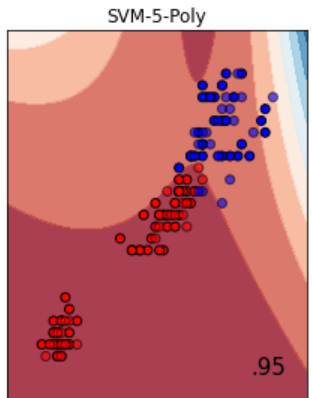

5.  Do not separate the train/test sets by yourselves, just feed into plot_2d_examples. It has its own split inside. Also it prints test set scores on the bottom right corner of each figure. According to these scores, which (degree,$C$) pair produced the best results? Please indicate your answer explicitly.
6.  Also comment on $C$ values. Which $C$ value range is reasonable do you think? After which value, it looks like an overfit?

**Important Note: Write your answers to Q5 and Q6 as two different markdown cell in Jupyter Notebook under your figures.**

In [13]:
# import libraries
import pandas as pd
import sklearn
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

sns.set()

In [18]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [21]:

disp = DecisionBoundaryDisplay.from_estimator(
   Classifier, X, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")

plt.show()

NameError: name 'Classifier' is not defined

In [22]:
#view data description and information
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Text(0, 0.5, 'Petal width')

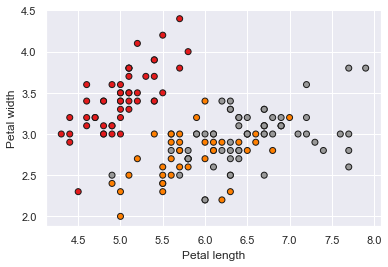

In [23]:
# plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

In [24]:
# make sure to save the data frame to a variable
data = pd.DataFrame(iris.data)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
# put target data into data frame
target = pd.DataFrame(iris.target)

In [27]:
df = pd.concat([data, target], axis = 1)

In [28]:
df.head()

,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df.dtypes

0    float64
1    float64
2    float64
3    float64
0      int64
dtype: object

In [30]:
# splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
# training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

array([1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0,
       0, 2, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2,
       2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0])

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 2)
(105,)
(45, 2)
(45,)


In [33]:
# testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

In [34]:
# creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [35]:
# creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLOR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLOR','VIRGINICA'])

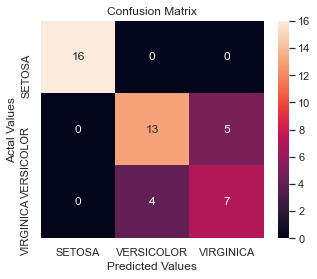

In [36]:
# plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [37]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)


In [38]:
# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)


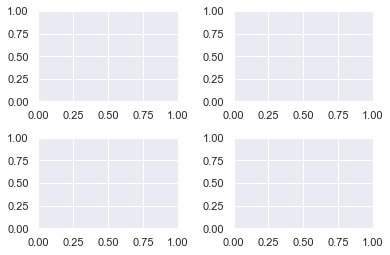

In [39]:
# set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

In [43]:
for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [44]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

In [45]:
# REFERENCES:
# https://stackoverflow.com/
# https://github.com/
# https://towardsdatascience.com/
# https://www.analyticsvidhya.com/
# https://www.geeksforgeeks.org/
# https://medium.com/
# https://scikit-learn.org/
# https://splunktool.com/
# http://www.cse.chalmers.se/
